In [1]:
#importing libaries
import pmaw
from pmaw import PushshiftAPI                               #Importing wrapper library for reddit(Pushshift)
import datetime as dt                                       #Importing library for date management
import pandas as pd                                         #Importing library for data manipulation in python
import matplotlib.pyplot as plt                             #Importing library for creating interactive visualizations in Python
from pprint import pprint  

In [2]:
pd.set_option("display.max_columns", None)                  #set no limit to the pandas dataframe,show all the replies
api = PushshiftAPI() 

In [3]:
#make a requset through api to the selected subreddit, result will be put into a pd.dataframe
#for post only
def data_prep_posts(subreddit, start_time, end_time, filters, limit):
    if(len(filters) == 0):
        filters = ['id', 'author', 'created_utc',
                   'domain', 'url',
                   'title', 'num_comments']                 #We set by default some columns that will be useful for data analysis

    posts = list(api.search_submissions(
        subreddit=subreddit,                                #We set the subreddit we want to audit
        after=start_time,                                   #Start date
        before=end_time,                                    #End date
        filter=filters,                                     #Column names we want to get from reddit
        limit=limit))                                       #Max number of posts we wanto to recieve

    return pd.DataFrame(posts)

In [4]:
#Comments only
def data_prep_comments(term, start_time, end_time, filters, limit):
    if (len(filters) == 0):
        filters = ['id', 'author', 'created_utc',
                   'body', 'permalink', 'subreddit']        #we set by default some columns that will be useful for data analysis

    comments = list(api.search_comments(
        q=term,                                             #we set the subreddit we want to audit
        after=start_time,                                   #Start date
        before=end_time,                                    #End date
        filter=filters,                                     #column names we want to get from reddit
        limit=limit))                                       #Max number of comments we wanto to recieve
    return pd.DataFrame(comments)  

In [5]:
#data visulization
#post counts per day for specific subreddit
def count_posts_per_date(df_p, title, xlabel, ylabel):
    df_p.groupby([df_p.datetime.dt.date]).count().plot(y='id', rot=45, kind='bar', label='Posts')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show()

In [6]:
#average post per day
def mean_comments_per_date(df_p, title, xlabel, ylabel):
    df_p.groupby([df_p.datetime.dt.date]).mean().plot(y='num_comments', rot=45, kind='line', label='Comments')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show()

In [7]:
#most active users
def most_active_author(df_p, title, xlabel, ylabel, limit):
    df_p.groupby([df_p.author]).count()['id'].nlargest(limit).sort_values(ascending=True).plot(y='id', rot=45, kind='barh', label='Users')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show()

In [8]:
#get most active subreddit accordingto the search term, doesn't have to be UCSC reddit
def get_subreddits(df_p, title, xlabel, ylabel, limit):
    df_p.groupby(by='subreddit').count()['id'].nlargest(limit).sort_values(ascending=True).plot(kind='barh', x='subreddit', label='Subreddit', legend=True, figsize=(8,13))
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show()


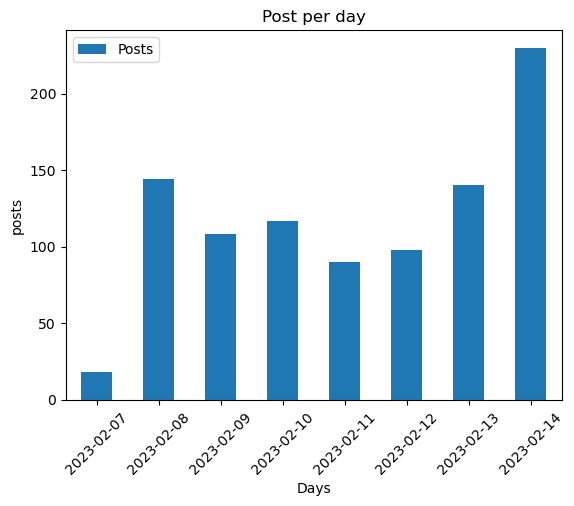

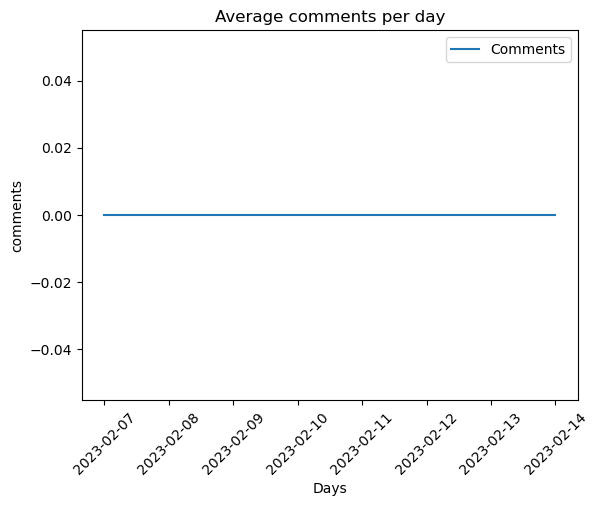

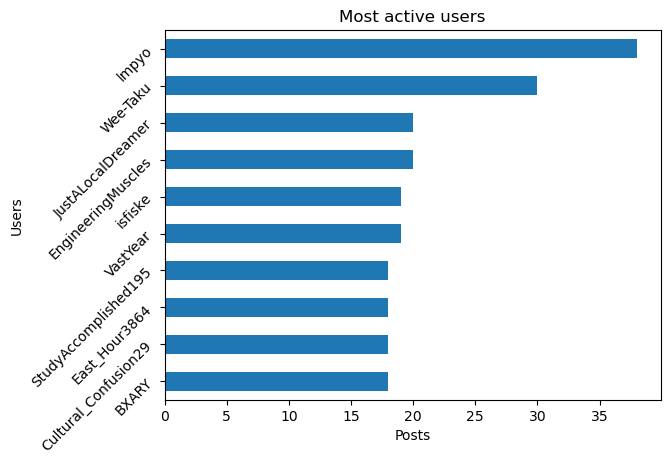

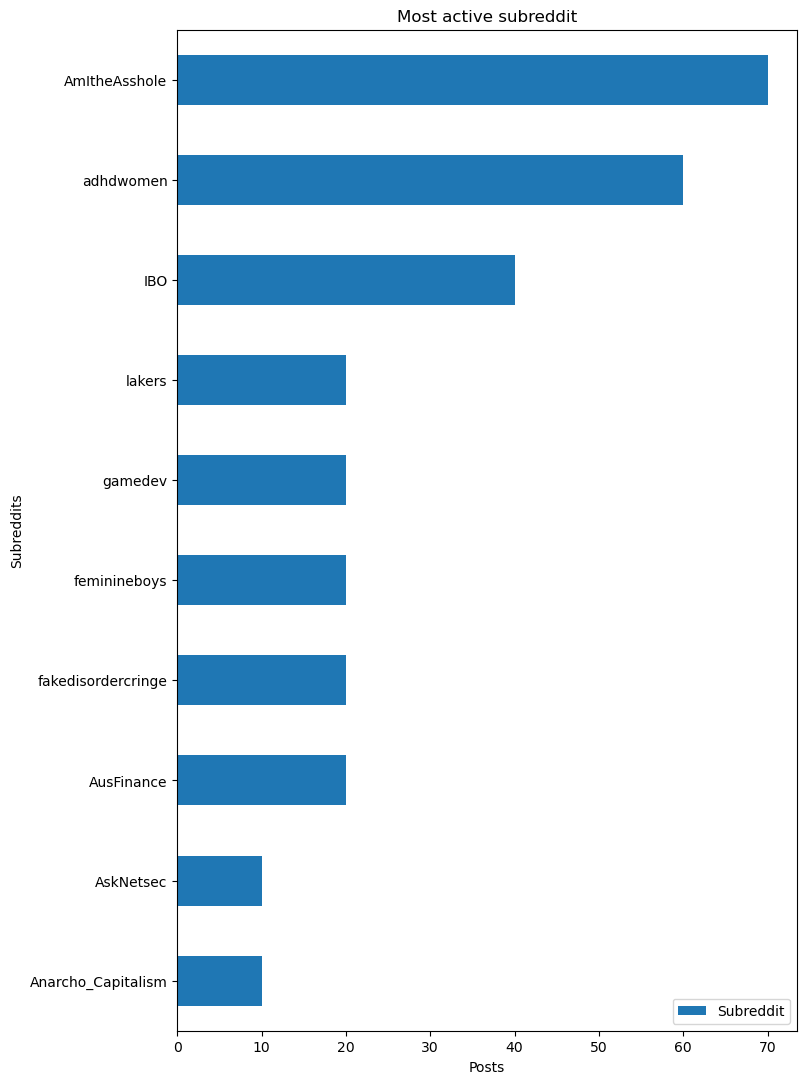

In [12]:

def main():
    subreddit = "UCSC"                           #UCSC subreddit
    start_time = int(dt.datetime(2023, 1, 1).timestamp())  #start date
    end_time = int(dt.datetime(2023, 2, 15).timestamp())   #end date
    filters = []                                           #filter the specfic colums if needed
    limit = 1000                                           #maximun posts per request

    """Here we are going to get subreddits for a brief analysis"""
    df_p = data_prep_posts(subreddit,start_time,
                         end_time,filters,limit)           #call function for dataframe creation of comments

    df_p['datetime'] = df_p['created_utc'].map(
        lambda t: dt.datetime.fromtimestamp(t))
    df_p = df_p.drop('created_utc', axis=1)                #crop the column on timestamp format
    df_p = df_p.sort_values(by='datetime')                 #sort the Row by time
    df_p["datetime"] = pd.to_datetime(df_p["datetime"])    #convert timestamp format to datetime for data analysis


    df_p.to_csv(f'dataset_{subreddit}_posts.csv', sep=',', # save the dataset on a csv file for future analysis
                header=True, index=False, columns=[
            'id', 'author', 'datetime', 'domain',
            'url', 'title', 'num_comments'
        ])

    count_posts_per_date(df_p, 'Post per day', 'Days',     #plot post counts
                         'posts')
    mean_comments_per_date(df_p,                           #plot average comments
                           'Average comments per day',
                           'Days', 'comments')
    most_active_author(df_p, 'Most active users',          #plot the active user under the subbreddit
                       'Posts', 'Users', 10)

    """get comments for analysis"""
    term = 'math'                                        #term we want to search for
    limit = 1000                                          #number of result will receive
    df_c = data_prep_comments(term, start_time,             #call function for dataframe creation of comments
                         end_time, filters, limit)

    get_subreddits(df_c, 'Most active subreddit', 'Posts',  #most active subreddirt according to the specific term
                   'Subreddits', 10)




if __name__== "__main__" : main()